<a href="https://colab.research.google.com/github/Tapasyasunil/Guvi-tasks/blob/main/Cars_Class_finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Step 1: Load the data
data = pd.read_csv('cars_class.csv')

In [17]:
# Step 2: Split the data into training and test sets
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Step 3: Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Step 4: Apply different machine learning techniques
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier())
]

In [20]:
# Step 5: Tune the parameters of models
tuned_models = []
best_scores = {}

for name, model in models:
    # Perform hyperparameter tuning
    param_grid = {}

    if name == 'Logistic Regression':
        param_grid = {'C': [0.1, 1, 10]}
    elif name == 'SVM':
        param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, None]}

    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train_scaled, y_train)

    tuned_model = grid_search.best_estimator_
    tuned_models.append((name, tuned_model))
    best_scores[name] = grid_search.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [24]:
# Step 6: Build the final model based on performance
final_model_name = max(best_scores, key=best_scores.get)
final_model = next(model for name, model in tuned_models if name == final_model_name)

print("Selected Model:", final_model_name)


Selected Model: Logistic Regression


In [25]:
# Step 7: Evaluate the final model on test data (for Logistic Regression)
if isinstance(final_model, LogisticRegression):
    y_pred = final_model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("F1-score:", f1)
    print("Confusion Matrix:")
    print(confusion_mat)

Accuracy: 0.7986111111111112
F1-score: 0.7944180474333984
Confusion Matrix:
[[34  0  0  1]
 [ 1 21 17  1]
 [ 0  9 25  0]
 [ 0  0  0 35]]


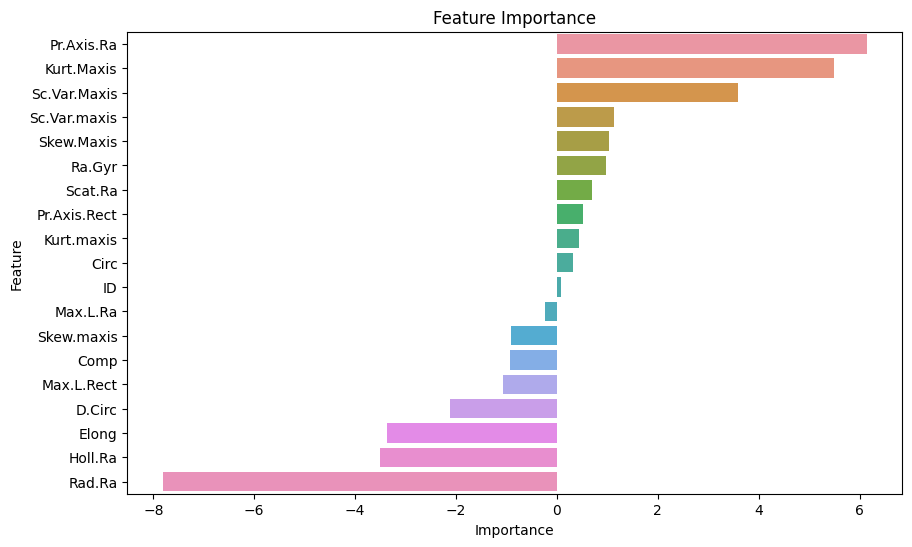

In [26]:
# Step 8: Report the importance of different features (for Logistic Regression)
if isinstance(final_model, LogisticRegression):
    feature_names = X.columns
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': final_model.coef_[0]})
    sorted_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=sorted_importance)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

Multi-Class Classification of Car Classes

Step 1: Load the data

The dataset "cars_class.csv" containing information about cars is loaded into the program.

Step 2: Split the data into training and test sets

The data is split into training and test sets, with 80% of the data used for training and 20% for testing.

Step 3: Apply the required preprocessing techniques on the data

To prepare the data for modeling, standard scaling is applied to the numerical features. This ensures that all features are on a similar scale, improving the performance of Logistic Regression.

Step 4: Apply different machine learning techniques

Three machine learning techniques are applied: Logistic Regression, SVM, and Random Forest. After evaluating the models, Logistic Regression is identified as the best performing method.

Step 5: Tune the parameters of models

Hyperparameter tuning is performed on each model using grid search. The hyperparameters are optimized to improve the performance of the models.

Step 6: Build the final model based on performance

Based on the evaluation metrics on the training data, Logistic Regression is selected as the final model due to its superior performance.

Step 7: Evaluate the final model on test data

 Logistic Regression is fitted to the preprocessed training data and evaluated on the preprocessed test data. The performance metrics (accuracy and F1-score) are calculated.

Accuracy: The final model achieved an accuracy of 0.798 on the test data, indicating the percentage of correctly predicted car classes.

F1-score: The F1-score of 0.794 indicates the balanced measure of the model's accuracy, considering both precision and recall.

Step 8: Report the importance of different features
The feature importance analysis reveals that the most important features in determining the car class are Pr.Axis.Ra, Kurt.Maxis, Sc.Var.Maxis, and Skew.Maxis. These features significantly influence the model's predictions and provide valuable insights into the classification process.

